<Figure size 1920x1440 with 0 Axes>

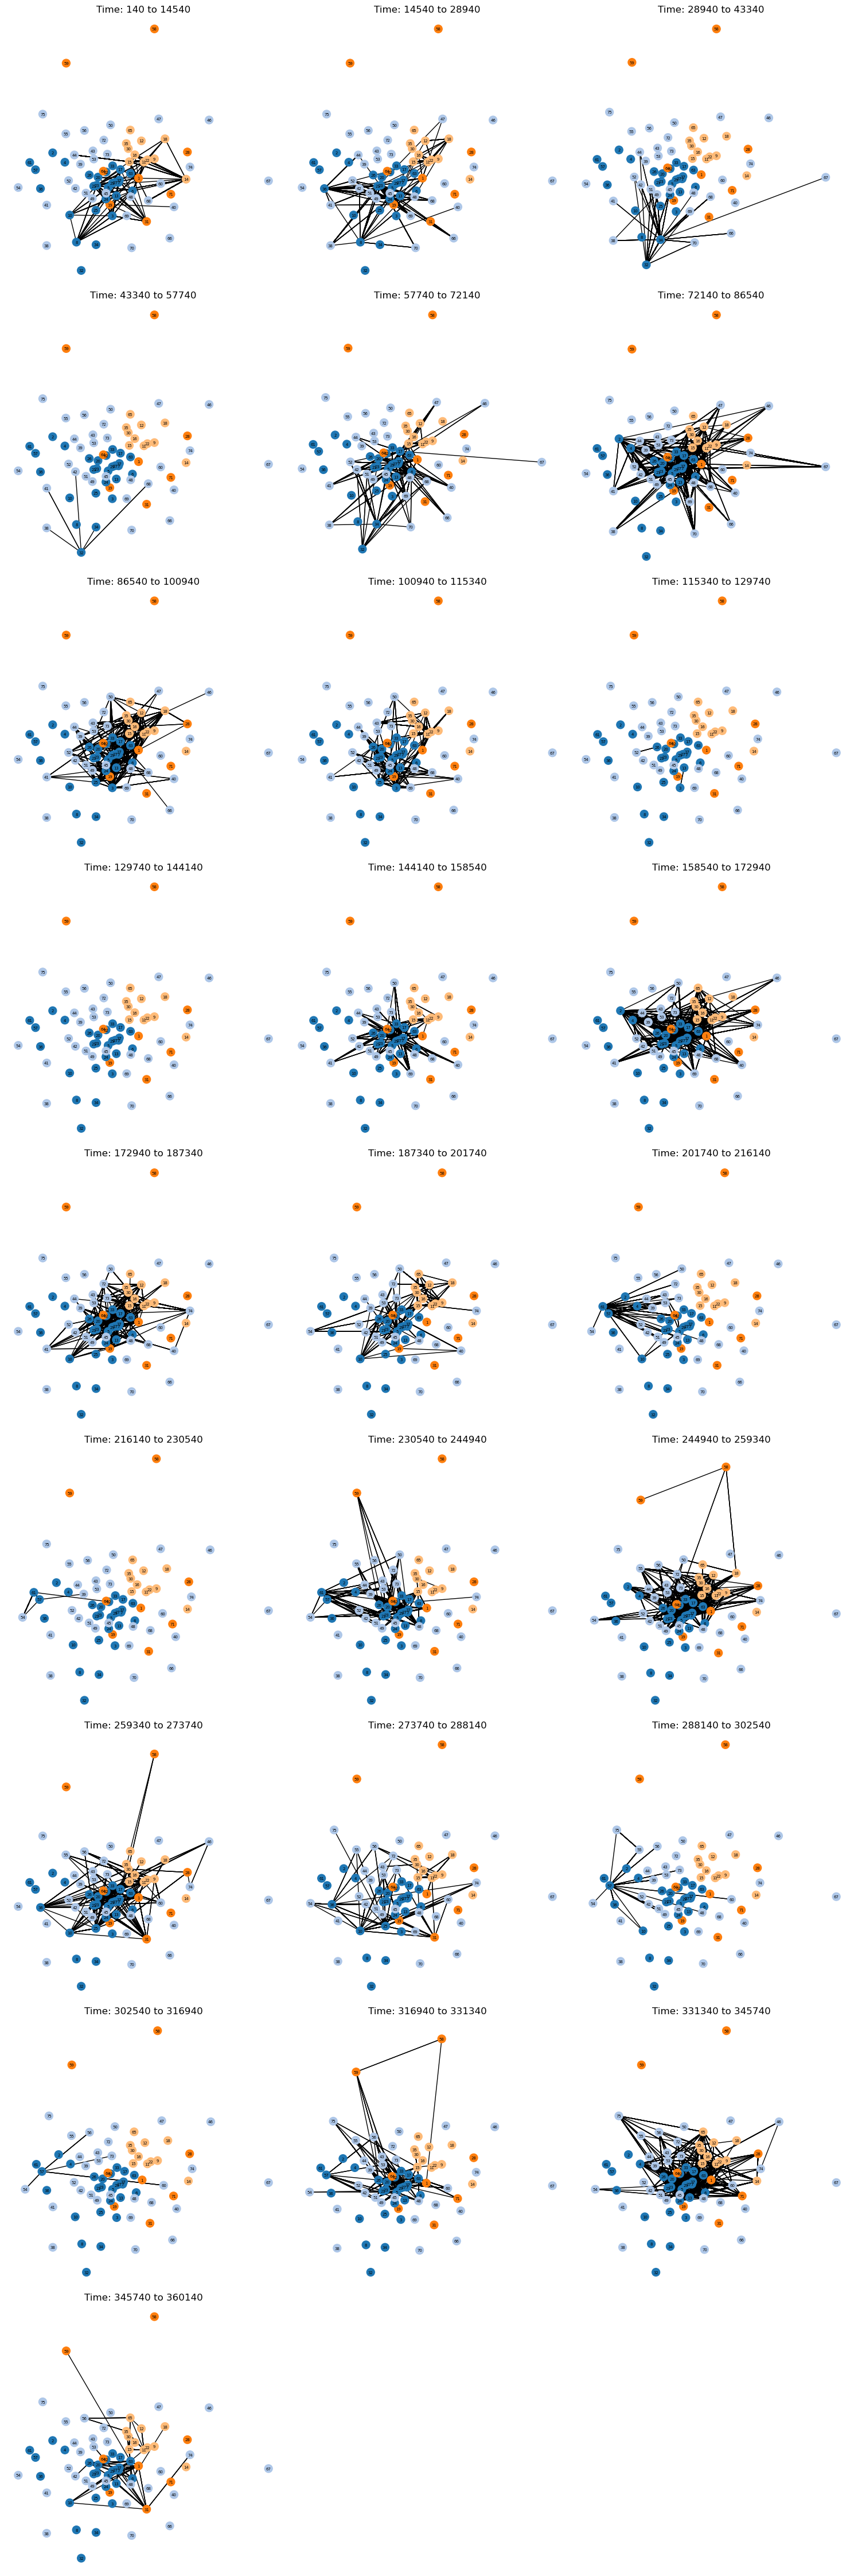

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load CSV files
edges_df = pd.read_csv('rfid_lyon_contacts.csv')
nodes_df = pd.read_csv('rfid_lyon_people.csv')

# Time interval (8 hours in seconds)
interval = 4 * 3600

# Determine the range of times
start_time = edges_df['time'].min()
end_time = edges_df['time'].max()

# Number of intervals
num_intervals = np.ceil((end_time - start_time) / interval).astype(int)

# Create the main graph
G = nx.MultiGraph()
for idx, row in nodes_df.iterrows():
    G.add_node(row['ID'], status=row['status'])

# Add all edges to get a consistent layout
for idx, row in edges_df.iterrows():
    G.add_edge(row['ID1'], row['ID2'], time=row['time'])

# Save the figure with high resolution
plt.figure(dpi=300)  


# Precompute the layout based on the full graph
pos = nx.spring_layout(G)

# Define color map for nodes
unique_statuses = set(nodes_df['status'])
color_map = {status: plt.cm.tab20(i) for i, status in enumerate(unique_statuses)}

# Setup plot grid
fig, axes = plt.subplots(nrows=(num_intervals // 3 + 1), ncols=3, figsize=(15, 5 * (num_intervals // 3 + 1)))
axes = axes.flatten()

# Generate subgraphs for each time interval and plot
for i in range(num_intervals):
    lower_bound = start_time + i * interval
    upper_bound = lower_bound + interval
    sub_edges = edges_df[(edges_df['time'] >= lower_bound) & (edges_df['time'] < upper_bound)]

    # Create subgraph for this interval
    subG = nx.MultiGraph()
    subG.add_nodes_from(G.nodes(data=True))  # Add all nodes with attributes
    for idx, row in sub_edges.iterrows():
        subG.add_edge(row['ID1'], row['ID2'], time=row['time'])

    # Apply colors based on the 'status' attribute
    node_colors = [color_map[subG.nodes[node]['status']] for node in subG]

    # Plot the subgraph using the precomputed positions
    nx.draw(subG, pos, ax=axes[i], with_labels=True, node_color=node_colors, node_size=100, edge_color='k', linewidths=1, font_size=5)

    # Add a title to each subplot
    axes[i].set_title(f"Time: {lower_bound} to {upper_bound}")

# Hide any unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
